In [ ]:
import pandas as pd
import numpy as np

In [ ]:
ds = pd.read_csv('spamdataset.csv')

In [ ]:
ds.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4247,spam,"accordingly. I repeat, just text the word ok o...",NaN,NaN,NaN
3655,ham,Oh really?? Did you make it on air? What's you...,NaN,NaN,NaN
244,ham,U don't remember that old commercial?,NaN,NaN,NaN
4006,ham,I'm reaching home in 5 min.,NaN,NaN,NaN
4839,spam,PRIVATE! Your 2003 Account Statement for shows...,NaN,NaN,NaN
2770,ham,No problem. Talk to you later,NaN,NaN,NaN
218,ham,I have to take exam with march 3,NaN,NaN,NaN
3490,ham,Ok.,NaN,NaN,NaN
1457,spam,CLAIRE here am havin borin time & am now alone...,NaN,NaN,NaN
5303,ham,"I can. But it will tell quite long, cos i have...",NaN,NaN,NaN


# size of dataset

In [ ]:
ds.shape

(5572, 5)

# **1.Data Cleaning**

In [ ]:
ds.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

# removing columns with null values

In [ ]:
ds.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
ds.sample(5)

,v1,v2
458,ham,1.20 that call cost. Which i guess isnt bad. M...
3713,ham,"Oh, i will get paid. The most outstanding one ..."
144,ham,Yes see ya not on the dot
228,ham,Life is more strict than teacher... Bcoz Teach...
1446,ham,Looks like u wil b getting a headstart im leav...


# renaming the columns

In [ ]:
ds.rename(columns={'v1':'Output', 'v2':'Input'},inplace=True)

In [ ]:
ds.sample(10)

,Output,Input
2375,ham,Thanx 4 2day! U r a goodmate I THINK UR RITE S...
1541,ham,Do u konw waht is rael FRIENDSHIP Im gving yuo...
2094,spam,PRIVATE! Your 2004 Account Statement for 07742...
5191,ham,"Sorry, I'll call later"
433,ham,Booked ticket for pongal?
3365,ham,I am waiting for your call sir.
703,ham,"Thats a bit weird, even ?- where is the do sup..."
1244,ham,Now? I'm going out 4 dinner soon..
4038,ham,I cant pick the phone right now. Pls send a me...
581,ham,Ok anyway no need to change with what you said


# representing ham as 0 and spam as 1

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
ds['Output'] = encoder.fit_transform(ds['Output'])

In [ ]:
ds.head()

,Output,Input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# missing values checking

In [ ]:
ds.isnull().sum()

Output    0
Input     0
dtype: int64

# checking duplicate Values

In [ ]:
ds.duplicated().sum()

403

# removing duplicated values

In [ ]:
ds=ds.drop_duplicates(keep='first')

In [ ]:
ds.duplicated().sum()

0

In [ ]:
ds.shape

(5169, 2)

 # 2.**Exploratory Data Analysis(EDA)**

In [ ]:
ds.head()

,Output,Input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# calculating spams and hams

In [ ]:
ds['Output'].value_counts()

0    4516
1     653
Name: Output, dtype: int64

# representing in pie chart

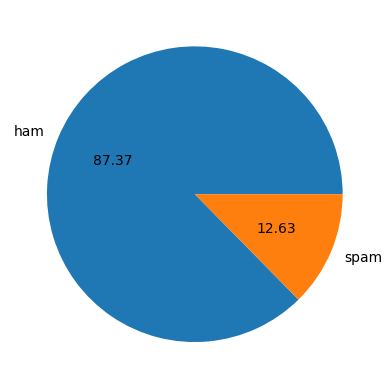

In [ ]:
import matplotlib.pyplot as plt
plt.pie(ds['Output'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

# calculating no. of characters, words, sentences

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# no. of characters in each sms

In [ ]:
ds['num_characters'] = ds['Input'].apply(len)

<ipython-input-23-96d4d5622209>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['num_characters'] = ds['Input'].apply(len)


In [ ]:
ds.head()

,Output,Input,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


# no. of words in each sms

In [ ]:
ds['num_words'] = ds['Input'].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-25-48c08370ec17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['num_words'] = ds['Input'].apply(lambda x:len(nltk.word_tokenize(x)))


In [ ]:
ds.head()

,Output,Input,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


# no. of sentences in each sms

In [ ]:
ds['num_sentences'] = ds['Input'].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-27-0be3b538cfe5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['num_sentences'] = ds['Input'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [ ]:
ds.head()

,Output,Input,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


# description of characters, words and sentences

In [ ]:
ds[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.978332,18.455794,1.965564
std,58.236795,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


# ham description

In [ ]:
ds[ds['Output']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459699,17.123782,1.820195
std,56.358868,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


# spam description

In [ ]:
ds[ds['Output']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


# plotting histogram for ham and spam

In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

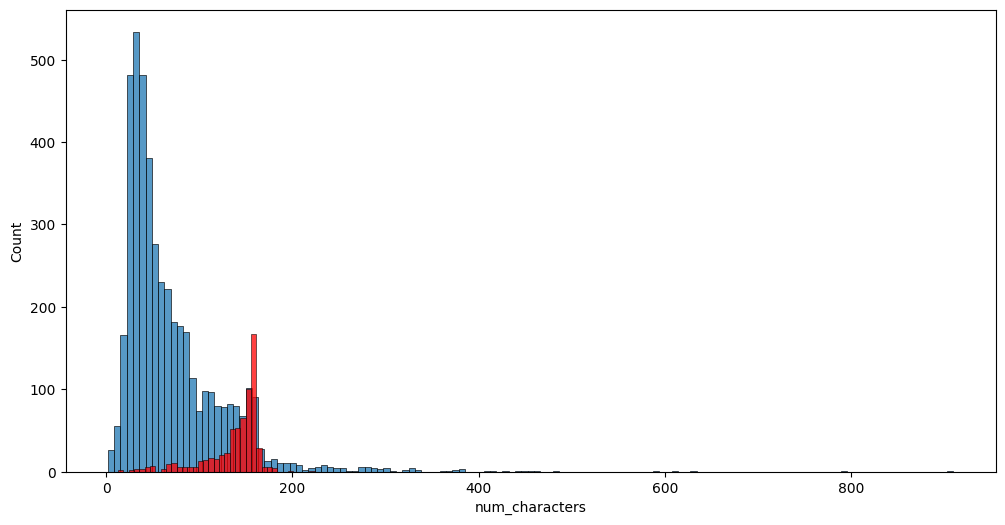

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(ds[ds['Output']==0]['num_characters']) #for hams
sns.histplot(ds[ds['Output']==1]['num_characters'],color='red') #for spams

<Axes: xlabel='num_words', ylabel='Count'>

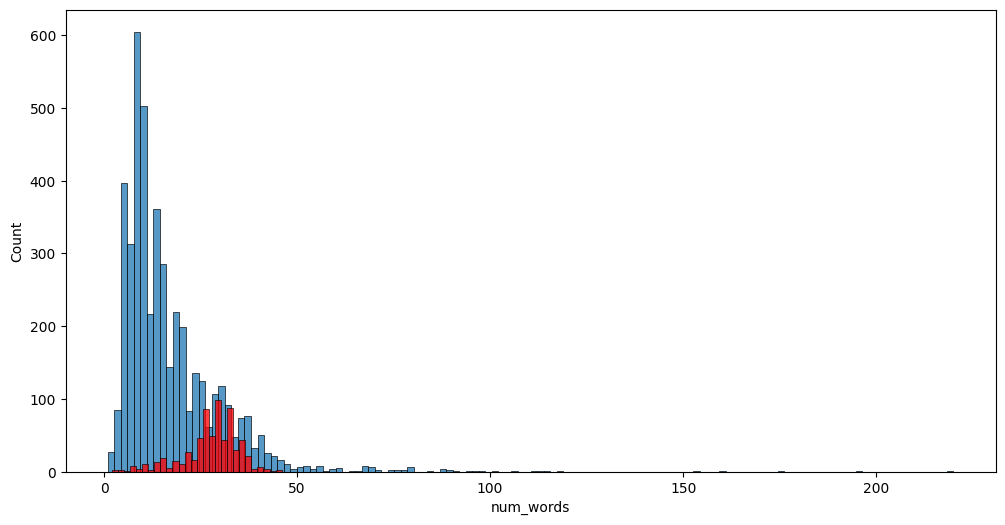

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(ds[ds['Output']==0]['num_words']) #for hams
sns.histplot(ds[ds['Output']==1]['num_words'],color='red') #for spams

#checking the relationship between different columns



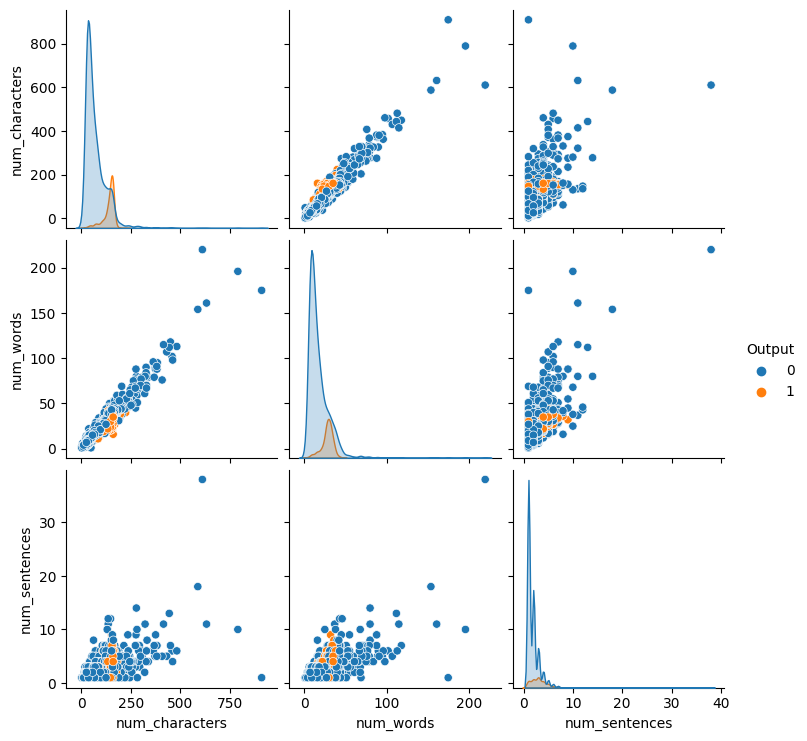

In [ ]:
sns.pairplot(ds,hue='Output')

<ipython-input-36-9a722f87ab81>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ds.corr(),annot=True)


<Axes: >

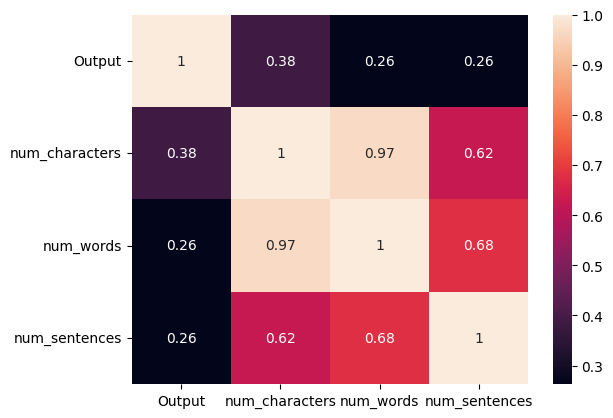

In [ ]:
sns.heatmap(ds.corr(),annot=True)

#3.Data Preprocessing
 -Lower Case
 -Tokenization
 -Removal Special Characters
 -Removing stop words and punctuations
 -Stemming

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def transform_text(text):
  text=text.lower() #lowercase
  text=nltk.word_tokenize(text) #tokenization
  y=[]
  for i in text: #removal of special characters
    if i.isalnum():
      y.append(i)
  text = y[:] #removing stop words and punctuation
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:] #Stemming
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [ ]:
ds['transformed_text'] = ds['Input'].apply(transform_text)
ds.head()

<ipython-input-38-0c3fddf65a78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['transformed_text'] = ds['Input'].apply(transform_text)


,Output,Input,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# generating word cloud for spam messages

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(ds[ds['Output']==1]['transformed_text'].str.cat(sep=" ")) #for spam cloud

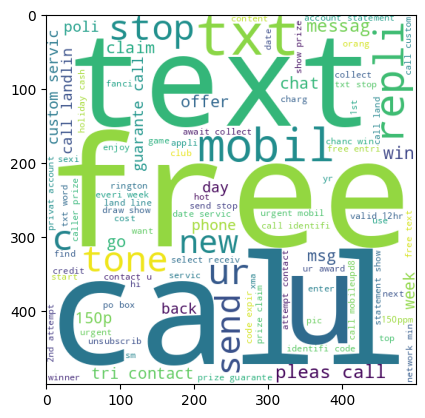

In [ ]:
plt.imshow(spam_wc)

# generating word cloud for ham messages

In [ ]:
ham_wc = wc.generate(ds[ds['Output']==0]['transformed_text'].str.cat(sep=" ")) #for ham cloud

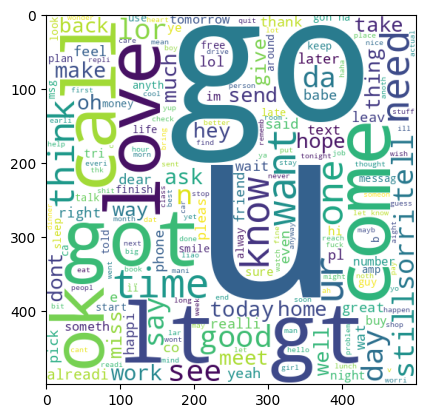

In [ ]:
plt.imshow(ham_wc)

#finding most common words in spam messages




In [ ]:
spam_corpus=[]
for msg in ds[ds['Output']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

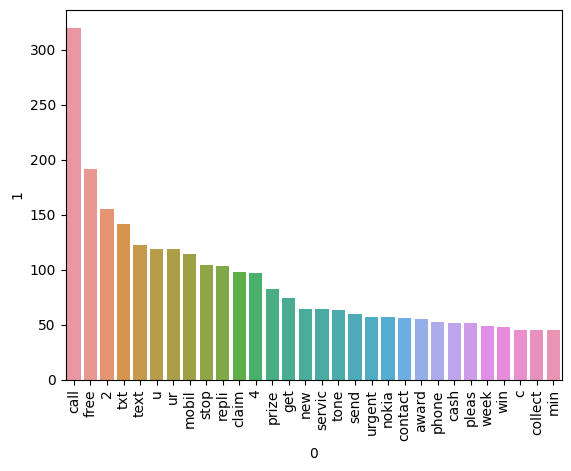

In [ ]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

#finding most common words in ham meassages

In [ ]:
ham_corpus=[]
for msg in ds[ds['Output']==0]['transformed_text'].tolist():
  for word in msg.split():
   ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

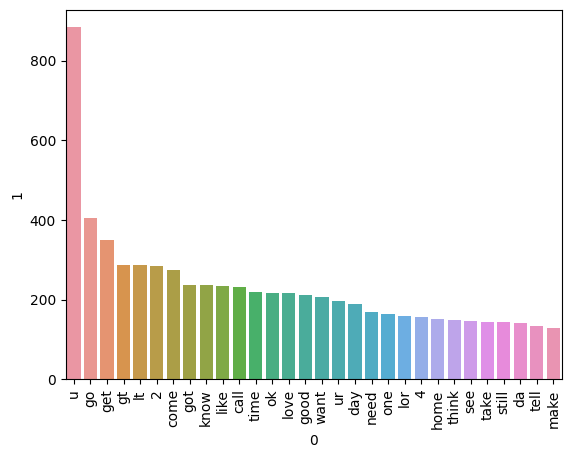

In [ ]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

#4.Model Building

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer #text vectorization
tfidf=TfidfVectorizer(max_features=3000)

In [ ]:
X=tfidf.fit_transform(ds['transformed_text']).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y=ds['Output'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2) #training and testing the dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB  #Using Ml Algorithm
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score #checking for accuracy and precision score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [ ]:
clfs = {
    'GNB' : gnb,
    'MNB' : mnb,
    'BNB' : bnb,
    'SVC' : svc,
    'KN' : knc,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'XGB' : xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  GNB
Accuracy -  0.8694390715667312
Precision -  0.5068493150684932
For  MNB
Accuracy -  0.9709864603481625
Precision -  1.0
For  BNB
Accuracy -  0.9835589941972921
Precision -  0.991869918699187
For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8415841584158416
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  XGB
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
1,MNB,0.970986,1.000000
4,KN,0.905222,1.000000
2,BNB,0.983559,0.991870
7,RF,0.975822,0.982906
3,SVC,0.975822,0.974790
10,ETC,0.974855,0.974576
6,LR,0.958414,0.970297
8,AdaBoost,0.960348,0.929204
12,XGB,0.967118,0.926230
11,GBDT,0.946809,0.919192


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,MNB,Accuracy,0.970986
1,KN,Accuracy,0.905222
2,BNB,Accuracy,0.983559
3,RF,Accuracy,0.975822
4,SVC,Accuracy,0.975822
5,ETC,Accuracy,0.974855
6,LR,Accuracy,0.958414
7,AdaBoost,Accuracy,0.960348
8,XGB,Accuracy,0.967118
9,GBDT,Accuracy,0.946809


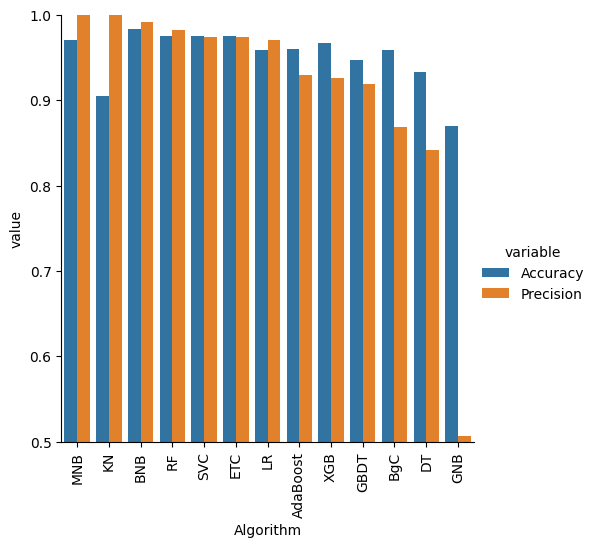

In [ ]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

#model improvement
1.Change the max features parameters of TfIdf9(improvement in accuracy and precision scores)
2.Applying Scaling (no improvement)
3.Adding extra column of num_characters,providing it to ml algorithm (no improvement)
4.Using Voting Classifier (no improvement)


#Final Conclusion
TF-IDF --> Multinomial NB

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))